Measurement outcomes:  {'000': 248, '011': 248, '010': 277, '001': 251}


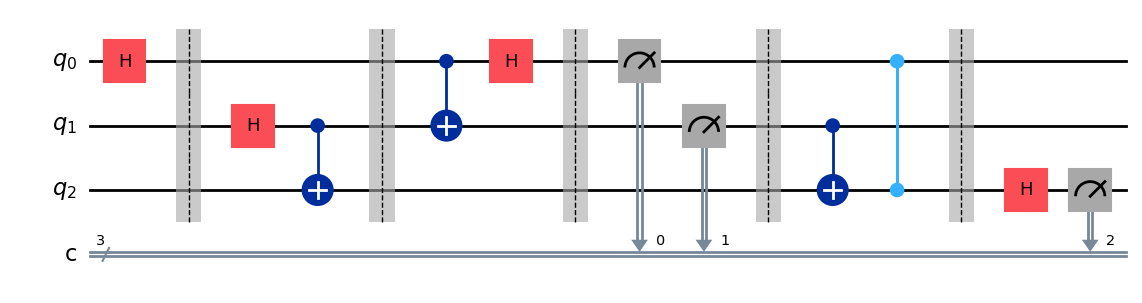

In [5]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# Initialize the Simulator
simulator = AerSimulator()

# Create a Quantum Circuit: 3 Qubits, 3 Classical Bits
# q0 = Secret, q1 = first half, q2 = second half
# We need a 3rd classical bit to measure second qubit's result at the end
qc = QuantumCircuit(3, 3)

# --- STEP 0: PREPARE THE SECRET (SUPERPOSITION) ---
# Put q0 into a 50/50 superposition
qc.h(0) 
qc.barrier()

# --- STEP 1: CREATE THE ENTANGLED BRIDGE ---
# Link q1 and q2 )
qc.h(1)
qc.cx(1, 2)
qc.barrier()

# --- STEP 2: MEASURING THE ENTANGLED PAIR ---
# Entangle the secret (q0) with the bridge (q1)
qc.cx(0, 1)
qc.h(0) # The "Unzipping" H gate
qc.barrier()

# Measure q0 and q1 into classical bits 0 and 1
qc.measure([0, 1], [0, 1])
qc.barrier()

# --- STEP 3: RESULT CORRECTION ---
# Use the classical results to fix Bob's q2
qc.cx(1, 2)
qc.cz(0, 2)
qc.barrier()

# --- STEP 4: VERIFICATION ---
# If teleportation worked, q2 should now be in the |+> state.
# To prove it, we apply an H gate to q2 to "reverse" the superposition.
# If it was |+>, it will turn back into a 0.
qc.h(2)
qc.measure(2, 2)

# Run the simulation
compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit, shots=1024)
result = job.result()
counts = result.get_counts()

print("Measurement outcomes: ", counts)
qc.draw('mpl')